 # Create your own movie!!
 ### Create a automatically generated horror movie screenplay,  look for movies from the public domain, and automatically let this script edit a new film.
 ### This is the first part, pre-production and screenplay writing!


 ## Pre-production and screenplay  writing

 ### Let's start by web scraping horror movie screenplays

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
drive_folder = './drive/My Drive/2020/'

In [ ]:
import requests
import urllib.request
import os
from bs4 import BeautifulSoup

SCREENPLAYS_URLS = ['https://www.simplyscripts.com/genre/horror-scripts.html',
                    'https://www.simplyscripts.com/genre/musical-scripts.html',
                    'https://www.simplyscripts.com/genre/film-noir-scripts.html',
                    'https://www.simplyscripts.com/genre/drama-scripts.html'
                    ]
FILE_TYPES = ['.pdf', '.txt']

# Folder with screenplays
SCREENPLAYS_FOLDER = 'screenplays'
if not os.path.exists(SCREENPLAYS_FOLDER):
    os.mkdir(SCREENPLAYS_FOLDER)

def scrape_screenplays(urls=SCREENPLAYS_URLS, 
                       screenplays_folder=SCREENPLAYS_FOLDER,
                       drive_folder=''):
    """Saves screenplays into .txt and .pdf files and returns file names

    Keyword Arguments:
        urls {string} -- [Urls to scrap] (default: {SCREENPLAYS_URLS})
        screenplays_folder {string} -- [Path to files] (default: {SCREENPLAYS_FOLDER})

    Returns:
        [list] -- [List of file names]
    """
    file_names = []
    movie_count = 0
    for url in urls:
        page = requests.get(url)
        soup = BeautifulSoup(page.content, 'html.parser')
        for link in soup.find_all('a'):
            file_link = link.get('href')
            try:
                if any(extension in file_link for extension in FILE_TYPES):
                    file = requests.get(file_link)
                    if '<html>' not in file:
                        file_name = file_link.split('/')[-1]
                        file_names.append(file_name)
                        with open(drive_folder + screenplays_folder + '//' + file_name, 'wb') as f:
                            f.write(file.content)
                            movie_count += 1
                            print(str(movie_count))
            except Exception as identifier:
                print(identifier)
    return file_names

file_names = scrape_screenplays()


1
HTTPSConnectionPool(host='dl.sfy.ru', port=443): Max retries exceeded with url: /pdf/2001_maniacs_(2004).pdf (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7f19aa3cd908>: Failed to establish a new connection: [Errno -2] Name or service not known',))
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
HTTPConnectionPool(host='www.vagrantmovie.com', port=80): Max retries exceeded with url: /Vagrant.pdf (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f19aa43ed30>: Failed to establish a new connection: [Errno -2] Name or service not known',))
136


 ### We continue to parse the names and get more info about the movies using IMDB's API
 ### Preliminary inspection shows a pattern '%20' that should be replaced with a blank space
 ### We also parse the scripts themselves to know their format

In [ ]:
!pip install IMDbPY

import pandas as pd
from imdb import IMDb # documentation on https://imdbpy.github.io/


def get_imdb_info(file_names, data_labels=['title', 'rating', 'year', 'genre']):
    imdb_object = IMDb()
    files_data = []
    for file_name in file_names:
        movie_name = file_name[:-4].replace('%20', '') # Erase extension and %20 characters
        print(movie_name)
        movie_list = imdb_object.search_movie(movie_name)
        imdb_info = { data_label : None for data_label in data_labels}


        if movie_list:
            movie_id = movie_list[0].getID() # Assumes first movie on search is the correct one
            movie = imdb_object.get_movie(movie_id)
            for key, value in imdb_info.items():
                imdb_info[key] = movie[key] if movie.has_key(key) else None

        # Save file_name and imdb extracted data
        imdb_info['file_name'] = file_name
        files_data.append(imdb_info)
    return files_data

def get_file_info(file_names, screenplays_folder=SCREENPLAYS_FOLDER):
    has_html_column = []
    is_txt = []
    for file_name in file_names:
        text_has_html = False
        text = open(screenplays_folder + '//' + file_name, 'rb').readlines()

        for line in text:
            if '<html>' in str(line):
                text_has_html = True
                break
        is_txt.append(True if 'txt' in file_name else False)
        has_html_column.append(text_has_html)
    return has_html_column, is_txt



In [ ]:

# Get imdb that and data about files' format
files_data = get_imdb_info(file_names=file_names)
has_html_column, is_txt = get_file_info(file_names=file_names)

# Save dataframe to csv
movies_df = pd.DataFrame(files_data)
movies_df['has_html'] = has_html_column
movies_df['is_txt'] = is_txt
movies_df.to_csv('screenplays_full_data.csv')


thirteen_ghosts
sixth-sense
alien3_fasano
alien3_gibson
alien3_hill
alien3_twohy
alien3_red
ALIEN3unpickett
alienresurrection_early
alien_5
aliens_vs_predator
AmericanWerewolfInLondon,An
american_werewolf_paris
AmericanWerewolfInParis,An
army_of_darkness
Birds,The
TheBirds
BladeTrinity
The-Hills-Have-Eyes
bm
bm2
Carnivore(Unproduced)
cherryfalls
crow2037
cursethe
dawnofthedead
dayofthedead
deeprising
orig_script
bc_draft2
Dd5
Doom
EventHorizon
evildead_script
evildead2script
army_of_darkness
Fallen
Feast-EarlyDraft
Feast-RevisedDraft
finaldestination
fvj
jvsf_bm
FreddyVsJason
FreddyVsJason_final_draft
FreddysDead-TheFinalNightmare
Friday1
friday13th3
friday13th6
friday13thjasongoestohell
duskdawn
go_to_hell
gothika
GRUDGE,THE-2004.01.26-DOUBLE-BLUE
halloween_script
halloween4
H20
Halloween8_shooting
Hannibal-Mamet
Hannibal-Zaillian
hardware
hardware
hw2_ground_zero
Hellboy
hr3-910701
hr4-95----
hr6-010221
hr6-001027
DEADER
hr7-020829
The-Hills-Have-Eyes
TheHitcher
horror_inc
houseOfThe

 ### We filter further our new dataset (and do some visualizations)
 #### We found a significant negative relation between year of publication and rating for our dataset. One possible explanation is the all around quality of older movies people watch is better, which makes sense.
 #### Who remembers low quality art from a century ago? Nobody. All we remember is the good stuff, unlike what is contemporary, because of exposure to it.
 #### In any case, one would expect some kind of correlation between movie ratings, and their scripts. So for a better automatically generated one, we can filter our dataset to use older scripts. If quality is what we are looking for of course.

In [ ]:
# Read screenplay files from local folder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

if movies_df is not None:
    movies_df = pd.read_csv('screenplays_full_data.csv')

movies_df = movies_df.dropna() # Drop if any row value is NaN

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


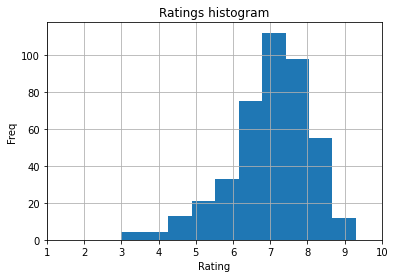

In [ ]:
# Ratings
plt.xlim(1, 10)
plt.xlabel('Rating')
plt.ylabel('Freq')
plt.title('Ratings histogram')
movies_df['rating'].hist()


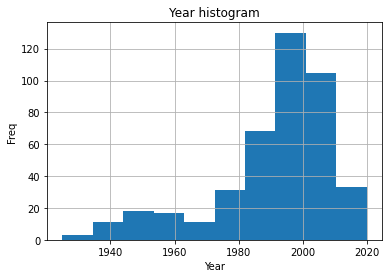

In [ ]:
# Year
plt.xlabel('Year')
plt.ylabel('Freq')
plt.title('Year histogram')
movies_df['year'].hist()

LinregressResult(slope=-0.013496451517870224, intercept=33.895608506874694, rvalue=-0.236118819613531, pvalue=8.023299889671474e-07, stderr=0.0026942478500905772)

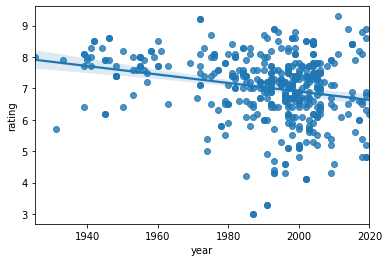

In [ ]:
# Relationship between year and rating (in my small dataset of films with script)
import scipy.stats
ax = sns.regplot(x='year', y='rating', data=movies_df)
scipy.stats.linregress(movies_df['year'], movies_df['rating'])


 ### A recurrent neural network is trained with the screenplays, to generate a new one

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scripts into one string variable
selected_movies = ['TheThing.txt', 'legend.txt']

def create_training_dataset(movies_df, selected_movies):
    movies = movies_df[(~movies_df['has_html']) & (movies_df['is_txt'])]
    file_names = movies[movies['file_name'].isin(selected_movies)]['file_name']

    all_scripts_text = ''
    for index, file_name in file_names.iteritems():
        print(file_name)
        text = str(open(SCREENPLAYS_FOLDER + '//' + file_name, 'rb').read()
        .decode('utf-8', 'ignore')).encode("utf-8")
        all_scripts_text += str(text) + ' '
        print ('Length of text: {} characters'.format(len(text)))

    return all_scripts_text

text = create_training_dataset(movies_df, selected_movies=selected_movies)


legend.txt
Length of text: 225337 characters
TheThing.txt
Length of text: 173990 characters


 ### Model creation, training, an text generation adapted from: https://www.tensorflow.org/tutorials/text/text_generation

 #### Epochs are more than tensorflow's example, and I use LSTM instead of GRU hidden layer (because I can take advantadge of GPU's computing power)

In [ ]:
# Unique characters in script files
vocab = sorted(set(text))

# Creating a mapping from unique characters to indices
char2idx = {u:i for i, u in enumerate(vocab)}
idx2char = np.array(vocab)
text_as_int = np.array([char2idx[c] for c in str(text)])

# The maximum length sentence we want for a single input in characters
seq_length = 101
examples_per_epoch = len(text)//(seq_length+1)

# Create training examples / targets
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)
sequences = char_dataset.batch(seq_length+1, drop_remainder=True)


In [ ]:
def split_input_target(chunk):
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text, target_text

dataset = sequences.map(split_input_target)

In [ ]:
# Batch size
BATCH_SIZE = 64

# Buffer size to shuffle the dataset
BUFFER_SIZE = 10000

dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

# Length of the vocabulary in chars
vocab_size = len(vocab)

# The embedding dimension
embedding_dim = 256

# Number of RNN units
rnn_units = 1024


In [ ]:
# We use a LSTM layer for better results, using Google Collaborative's GPU 
def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
  model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,
                              batch_input_shape=[batch_size, None]),
    tf.keras.layers.LSTM(rnn_units,
                        return_sequences=True,
                        stateful=True,
                        recurrent_initializer='glorot_uniform'),
    tf.keras.layers.Dense(vocab_size)
  ])
  return model

model = build_model(
  vocab_size = vocab_size,
  embedding_dim=embedding_dim,
  rnn_units=rnn_units,
  batch_size=BATCH_SIZE)


model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (64, None, 256)           20480     
_________________________________________________________________
lstm_2 (LSTM)                (64, None, 1024)          5246976   
_________________________________________________________________
dense_2 (Dense)              (64, None, 80)            82000     
Total params: 5,349,456
Trainable params: 5,349,456
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def loss(labels, logits):
  return tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True)


model.compile(optimizer='adam', loss=loss)

In [ ]:
import os
# Directory where the checkpoints will be saved
checkpoint_dir = './training_checkpoints'
# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)


In [ ]:
EPOCHS=50
history = model.fit(dataset, epochs=EPOCHS, callbacks=[checkpoint_callback])

Epoch 1/50
66/66 [==============================] - 6s 84ms/step - loss: 3.0774
Epoch 2/50
66/66 [==============================] - 5s 83ms/step - loss: 2.1845
Epoch 3/50
66/66 [==============================] - 6s 84ms/step - loss: 1.8414
Epoch 4/50
66/66 [==============================] - 5s 83ms/step - loss: 1.6725
Epoch 5/50
66/66 [==============================] - 6s 84ms/step - loss: 1.5630
Epoch 6/50
66/66 [==============================] - 6s 84ms/step - loss: 1.4716
Epoch 7/50
66/66 [==============================] - 6s 84ms/step - loss: 1.3987
Epoch 8/50
66/66 [==============================] - 6s 85ms/step - loss: 1.3306
Epoch 9/50
66/66 [==============================] - 6s 85ms/step - loss: 1.2753
Epoch 10/50
66/66 [==============================] - 6s 85ms/step - loss: 1.2263
Epoch 11/50
66/66 [==============================] - 6s 85ms/step - loss: 1.1788
Epoch 12/50
66/66 [==============================] - 6s 85ms/step - loss: 1.1360
Epoch 13/50
66/66 [==================

In [ ]:
tf.train.latest_checkpoint(checkpoint_dir)

# Generate text
model = build_model(vocab_size, embedding_dim, rnn_units, batch_size=1)

model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))


#model.build(tf.TensorShape([1, None]))


In [ ]:
def generate_text(model, start_string):
  # Evaluation step (generating text using the learned model)

  # Number of characters to generate
  num_generate = 1000

  # Converting our start string to numbers (vectorizing)
  input_eval = [char2idx[s] for s in start_string]
  input_eval = tf.expand_dims(input_eval, 0)

  # Empty string to store our results
  text_generated = []

  # Low temperatures results in more predictable text.
  # Higher temperatures results in more surprising text.
  temperature = 1.0

  # Here batch size == 1
  model.reset_states()
  for i in range(num_generate):
      predictions = model(input_eval)
      # remove the batch dimension
      predictions = tf.squeeze(predictions, 0)

      # using a categorical distribution to predict the character returned by the model
      predictions = predictions / temperature
      predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()

      # We pass the predicted character as the next input to the model
      # along with the previous hidden state
      input_eval = tf.expand_dims([predicted_id], 0)

      text_generated.append(idx2char[predicted_id])

  return (start_string + ''.join(text_generated))



### Finally we get our movie script


In [ ]:

my_movie_script = generate_text(model, start_string=u"T")
split_script = my_movie_script.split(sep='\n')

for sentence in split_script:
  print(sentence)


THILLS\r\ndon.\r\n\r\nINT.  KITCHEN\r\n\r\nMacReady is stil  it 1964 scrawls a bit.  When Neville \r\nsetury.  The sky.  The light scrawling into the spinnot\r\n\r\n                                            MACREADY\r\n          We can\'t learn anything from this.\r\n\r\n                        accolory...\r\n\r\nThe men as the shoved his flashlight one he\r\n          car..\r\n\r\nHe shows the area between the inner fence and goes to the DOG when he\r\nsnow buries into the hole in the room containing the humans.  The\r\ndead realizes Neville to the ground.  It BARKS A DOG\r\n\r\n                         PALMER\r\n          And everybody with them.  \r\nRegettent\t\t\tANNA\r\n\t\tAre you gonna rape me, protest?  \r\n\t\tSie meal not to allow the still ferso blowt to takes the far off blood in no seat.  Some Malse guast of signal.  A decent man.  \r\n\t\tThe process is still in the first snow.\r\n\r\nTEVEAL STORATION MOVING old up.\r\n\r\n\t\t\t\tGOVERNOf mind an informating the remot